# Linear Regression -Complete
A machine learning algorithm used to predict output values based on input values, provided thre exists an optimal linear relationshipbetween them

Characteristics of data:
1. Numeric
2. Continuous

# How to find whether Logistic Regression to be applied?
1. Is the dataset supervised? (having output column?)

2. Is the input data numeric?

3. Is the input data linear?

4. Is the output column categorical?

5. Is the output column probabilistic?

yes!!! You may use Logistic Regression

# is  dataset linear?
1. Use correlation
2. Plot scatter chart
3. may use pair plots

In [54]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df=pd.read_csv(r"C:\Users\DR.Noor Mahammad SK\Downloads\Admission_Predict.csv")
print(df.shape)
print(df.info())


(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB
None


In [56]:
print(df[df['Chance of Admit ']=='yes'].count())

Serial No.           367
GRE Score            367
TOEFL Score          367
University Rating    367
SOP                  367
LOR                  367
CGPA                 367
Research             367
Chance of Admit      367
dtype: int64


# Draw Scatter Plot

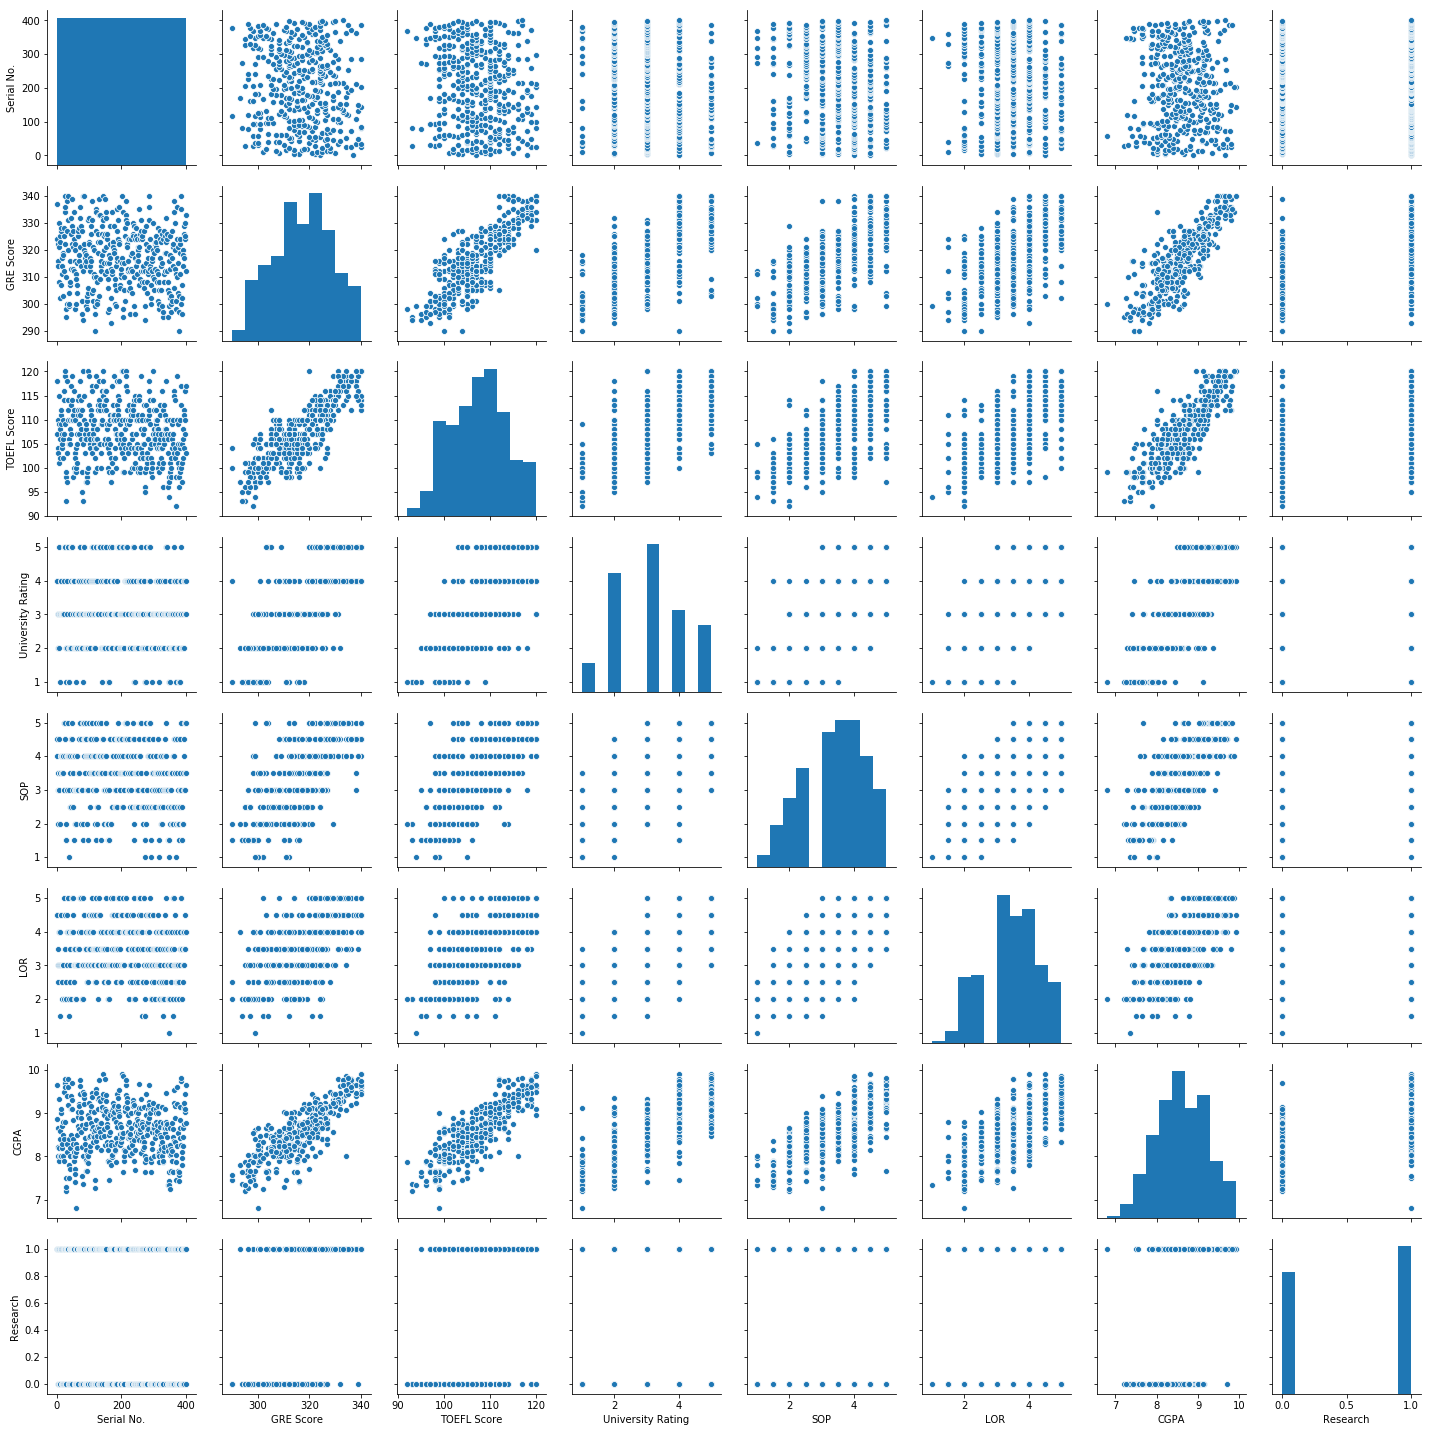

In [57]:
sb.pairplot(df)



                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

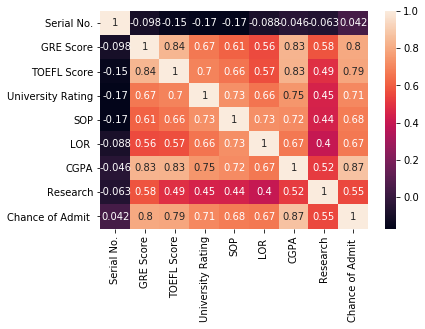

In [19]:
df1=df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [58]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,yes
1,324,107,4,4.0,4.5,8.87,1,yes
2,316,104,3,3.0,3.5,8.00,1,yes
3,322,110,3,3.5,2.5,8.67,1,yes
4,314,103,2,2.0,3.0,8.21,0,yes


In [59]:
df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Input and Output Splitting

In [60]:
from sklearn import linear_model
regress=linear_model.LogisticRegression()
df2=df.values
#print(df2)
train_x=(df2[:,0:6])
train_y=df2[:,7]
print(train_x.shape)
print(train_y.shape)

(400, 6)
(400,)


# MinMax Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
train_x=ms.fit_transform(train_x)
print(train_x)



[[0.94       0.92857143 0.75       0.875      0.875      0.91346154]
 [0.68       0.53571429 0.75       0.75       0.875      0.66346154]
 [0.52       0.42857143 0.5        0.5        0.625      0.38461538]
 ...
 [0.8        0.85714286 0.75       1.         0.875      0.84935897]
 [0.44       0.39285714 0.5        0.625      0.75       0.63461538]
 [0.86       0.89285714 0.75       1.         0.75       0.91666667]]


# Regression Line Fitting

In [62]:
regress.fit(train_x,train_y)
#The coefficents y=m0x0+m1x1+...+m11x11+c
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

Coefficients: [[1.95839542 1.98772901 0.26359802 0.04292297 1.61108466 2.65887296]]
Intercept: [-1.4915744]


In [45]:
#Example for 1D array: Taken from Kaggle
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
training_data_X    = np.array([ [1.2, 6.7, 2.7],  [2.3, 4.6, 2.2],  [0.3, 3.9, 0.8],  [2.1, 1.3, 4.3]  ])
training_scores_Y  = np.array( [1.4, 9.2, 2.5, 2.2] )
prediction_data_test  = np.array([ [1.5, 3.4, 2.2],  [7.6, 7.2, 0.2] ])
#clf = LogisticRegression()
#clf.fit(training_data_X, training_scores_Y)
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(training_scores_Y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(training_scores_Y))
print(utils.multiclass.type_of_target(training_scores_Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
clf = LogisticRegression()
clf.fit(training_data_X, training_scores_encoded)
print("LogisticRegression")
print(clf.predict(prediction_data_test))

[0 3 2 1]
continuous
multiclass
multiclass
LogisticRegression
[3 3]


# Prediction

In [63]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv(r"C:\Users\DR.Noor Mahammad SK\Downloads\Logistic_Result.csv")

yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\DR.Noor Mahammad SK\\Downloads\\Logistic_Result.csv'

# Plotting

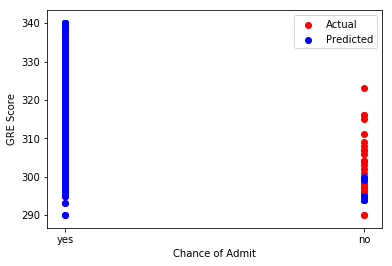

In [64]:
plt.scatter(df['Chance of Admit '],df['GRE Score'],color='red',label='Actual')
plt.scatter(df['Pred'],df['GRE Score'],color='blue',label='Predicted')
plt.xlabel('Chance of Admit')
plt.ylabel('GRE Score')
plt.legend()
plt.show()


# Metrics

In [66]:
from sklearn import metrics
print('Accuracy ', metrics.accuracy_score(train_y,y_predicted))
print('Confusion Matrix \n ', metrics.confusion_matrix(train_y,y_predicted))


Accuracy  0.9325
Confusion Matrix 
  [[  6  27]
 [  0 367]]


Text(0.5,1,'Accuracy Score:0.9325')

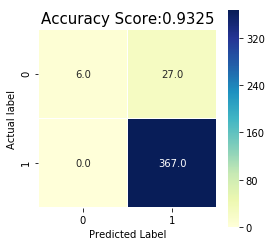

In [67]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted),annot=True,fmt=".1f",linewidths=.90,square=True,cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted Label')
all_sample_title='Accuracy Score:{0}'.format(metrics.accuracy_score(train_y,y_predicted))
plt.title(all_sample_title,size=15)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

          no       1.00      0.18      0.31        33
         yes       0.93      1.00      0.96       367

    accuracy                           0.93       400
   macro avg       0.97      0.59      0.64       400
weighted avg       0.94      0.93      0.91       400

